In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(polyps)

In [3]:
str(polyps)

'data.frame':	20 obs. of  3 variables:
 $ Number   : int  1 1 2 3 3 4 17 25 33 7 ...
 $ Treatment: Factor w/ 2 levels "Drug","Placebo": 1 1 1 1 1 1 1 1 1 2 ...
 $ Age      : int  22 23 16 23 23 42 22 17 23 34 ...


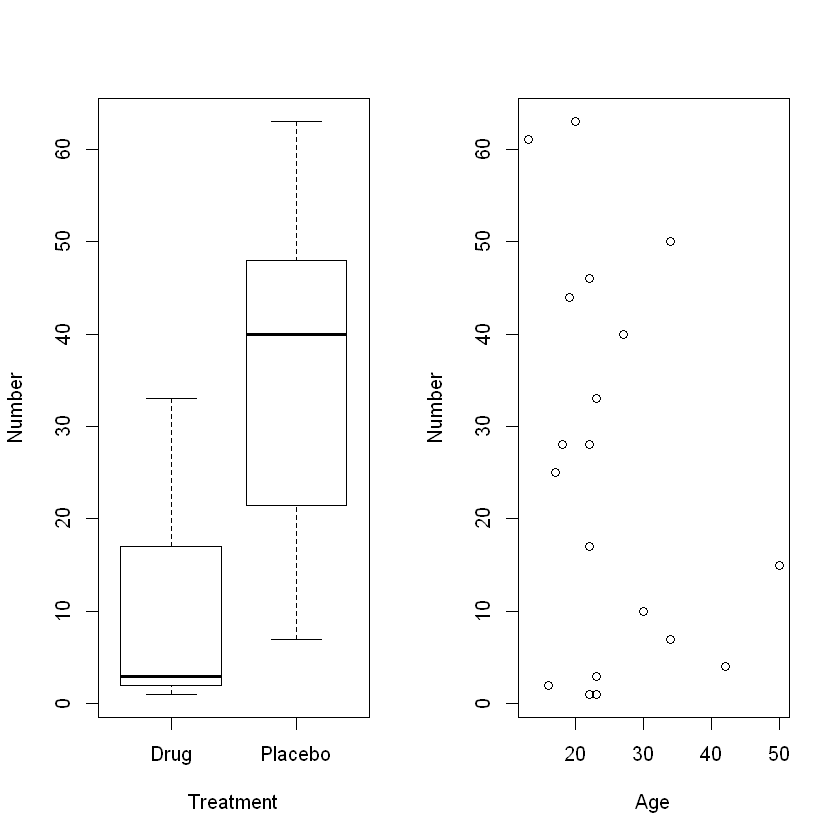

In [4]:
par(mfrow=c(1, 2))
plot(Number ~ Treatment, data=polyps)
plot(Number ~ Age, data=polyps)

In [5]:
glm.1 <- glm(Number ~ Treatment + Age, family=poisson(link="log"), data=polyps)

In [6]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.16994097,0.168210066,18.845132,3.221578e-79
TreatmentPlacebo,1.35908338,0.117643270,11.552581,7.163652e-31
Age,-0.03883027,0.005955279,-6.520311,7.016172e-11


In [8]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,19,378.6598,NA
Treatment,1,150.10082,18,228.5589,1.647869e-34
Age,1,49.01811,17,179.5408,2.536095e-12


In [13]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 3.563941e-29

[1] 9.69514e-30

[1] 10.56123

[1] 10.72805


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.94345, p-value = 0.2784


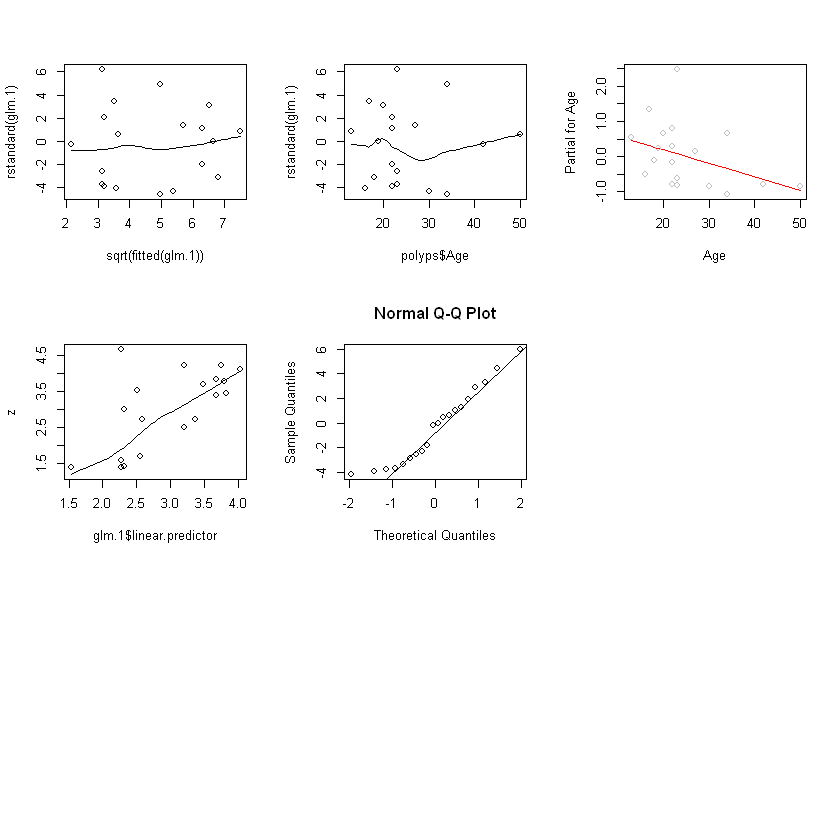

In [12]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ sqrt(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ polyps$Age)
termplot(glm.1, partial.resid = TRUE, terms="Age")
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
shapiro.test(qresid(glm.1))

In [14]:
glm.quasi <- glm(Number ~ Treatment + Age, family=quasipoisson(link="log"), data=polyps)

In [15]:
coef(summary(glm.quasi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.16994097,0.55095017,5.753589,2.339607e-05
TreatmentPlacebo,1.35908338,0.38532522,3.527107,2.587396e-03
Age,-0.03883027,0.01950574,-1.990710,6.283787e-02


In [16]:
anova(glm.quasi, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,19,378.6598,NA,NA
Treatment,1,150.10082,18,228.5589,13.991439,0.001628119
Age,1,49.01811,17,179.5408,4.569155,0.047375715



	Shapiro-Wilk normality test

data:  qresid(glm.quasi)
W = 0.93329, p-value = 0.1786


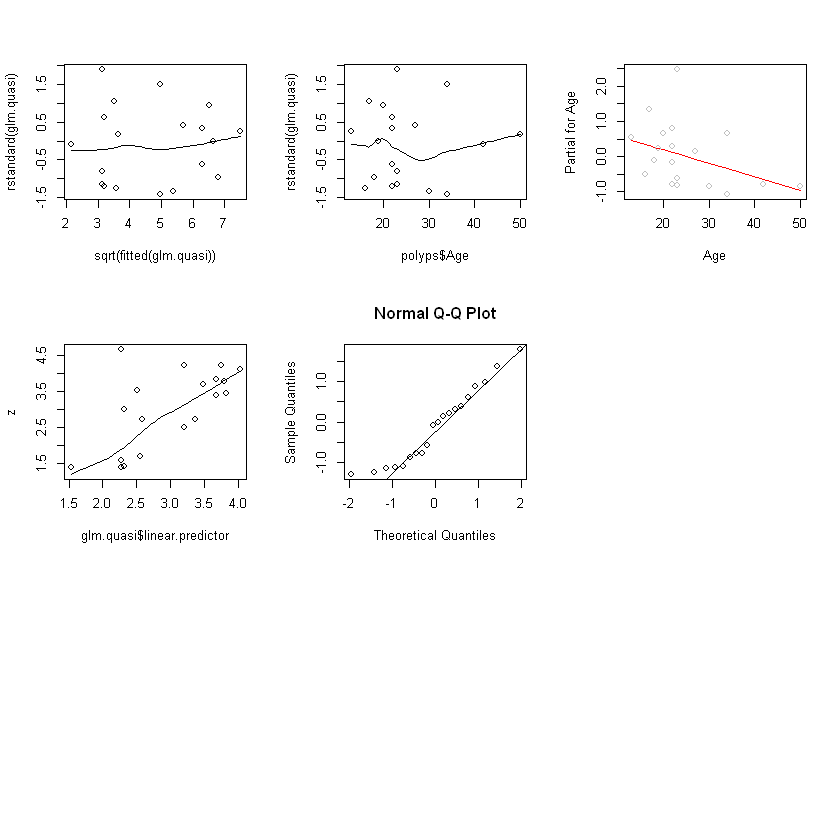

In [17]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.quasi) ~ sqrt(fitted(glm.quasi)))
scatter.smooth(rstandard(glm.quasi) ~ polyps$Age)
termplot(glm.quasi, partial.resid = TRUE, terms="Age")
z <- resid(glm.quasi, type="working") + glm.quasi$linear.predictor
scatter.smooth(z ~ glm.quasi$linear.predictor)
qqnorm(qresid(glm.quasi))
qqline(qresid(glm.quasi))
shapiro.test(qresid(glm.quasi))

In [19]:
glm.negbi <- glm.nb(Number ~ Treatment + Age, data=polyps)
glm.negbi <- glm.convert(glm.negbi)

In [20]:
coef(summary(glm.negbi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.1579073,0.60094524,5.254900,0.0000645123
TreatmentPlacebo,1.3681228,0.39776485,3.439527,0.0031282750
Age,-0.0385578,0.02258556,-1.707188,0.1059841440


In [21]:
anova(glm.negbi, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,19,36.73408,NA,NA
Treatment,1,11.587898,18,25.14618,9.974152,0.00574113
Age,1,3.144029,17,22.00215,2.706187,0.11832203


In [22]:
gof.dev <- deviance(glm.negbi)
gof.pearson <- sum(glm.negbi$weights * glm.negbi$residuals^2)

pchisq(gof.dev, df=df.residual(glm.negbi), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.negbi), lower.tail = FALSE)

gof.dev / df.residual(glm.negbi)
gof.pearson / df.residual(glm.negbi)

[1] 0.1846363

[1] 0.2871905

[1] 1.294244

[1] 1.161793

In [23]:
summary(glm.negbi)$dispersion

[1] 1.161793


	Shapiro-Wilk normality test

data:  qresid(glm.negbi)
W = 0.96726, p-value = 0.6962


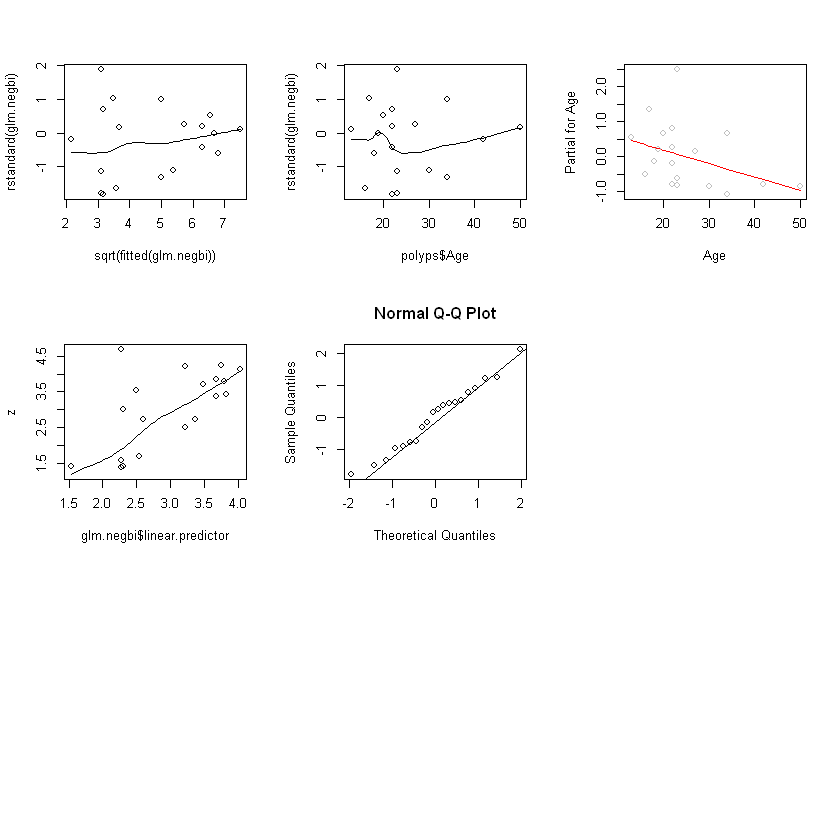

In [24]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.negbi) ~ sqrt(fitted(glm.negbi)))
scatter.smooth(rstandard(glm.negbi) ~ polyps$Age)
termplot(glm.negbi, partial.resid = TRUE, terms="Age")
z <- resid(glm.negbi, type="working") + glm.negbi$linear.predictor
scatter.smooth(z ~ glm.negbi$linear.predictor)
qqnorm(qresid(glm.negbi))
qqline(qresid(glm.negbi))
shapiro.test(qresid(glm.negbi))

In [28]:
extractAIC(glm.quasi)
extractAIC(glm.negbi)

[1]  3 NA

[1]   3.00 164.88